# 카운트 기반의 문서표현
* 카운트 기반의 문서표현은 딥러닝 기법이 나오기전에 단어의 통계를 이용해서 문서의 내용을 이해하고자 했던 시도이다.
* 일단 텍스트 마이닝을 하기 위해서는 우리는 단 하나의 문서나 문장에 대해서 수행하는 것이 아니고 여러 문서나 문장의 set에 대해서 수행을 한다.
* 텍스트 마이닝을 수행하기 위해선 기본적으로 텍스트를 수치형태로 임베딩 하여야 하는데, 이를 위해서는 텍스트의 특성을 단어로 표현하고 특성이 갖는 값을 단어의 횟수로 표현한다는 것이 `BOW(Bag Of Words)`의 기본 아이디어이다.
    * 가방에 들어있는 단어처럼 순서가 문장의 순서가 없어진다는 말이다.
* 이때, 모든 문서나 문장에 들어가는 단어들을 하나의 corpus로 만든후 문서나 문장을 임베딩 하여야 하는데<br> 당연하게도 0이 많은 sparse vector가 될것 이다. 이를 텍스트 마이닝을 지원하는 패키지들은 효율적으로 처리하기 위해서 각자 나름의 방법을 사용하였다.

# BOW기반의 카운트 벡터 생성
* 실습데이터는 NLTK가 재공하는 movie_revies라는 corpus를 사용한다.
* nltk에서 제공하는 corpus 데이터 set은 nltk.corpus.CorpusReader 클래스를 기반으로 한다.
* movie_reviews는 nltk.corpus.CorpusReader의 인스턴스이다.
    * 주요 함수들을 알아보면
        * `fileids()`: 문서들의 id를 반환한다.(매개변수 categories를 사용하면 특정 카테고리의 문서들의 id만 가져올 수 있다.)
        * `categories()`: 문서들의 분류. 즉, 라벨을 보여준다.
        * `raw()`: 리뷰문서의 원문을 문자열의 리스트 형태로 반환한다.<br>(인수로 fileid를 주면 특정 문서에 대한 결과만을 가져올 수 있다.)
        * `sents()`: 리뷰문서의 원문에 대해 NLTK의 sent_tokenize로 토큰화한 문장들을 word_tokenize로 토큰화한 결과를 반환한다.<br>(인수로 fileid를 주면 특정 문서에 대한 결과만을 가져올 수 있다.)
            * 따라서 2차원으로 나온다.
        * `words()`: 리뷰문서의 원문에 대해 word_tokenize로 토큰화한 결과를 반환한다.<br>(인수로 fileid를 주면 특정 문서에 대한 결과만을 가져올 수 있다.)
            * 따라서 1차원으로 나온다.
        *  `sents()`는 각 문장 별로 토큰화한 결과를 리턴하기 때문에 [:2]를 하면 두문장에 대한 word_tokenize결과가 나오고<br>`words()`는 전체 문서에 대해서 word_tokenize를 진행한 결과를 리턴한다.

In [4]:
import nltk
from nltk.corpus import movie_reviews

In [5]:
print('#review count:', len(movie_reviews.fileids()))
print('#samples of file ids:', movie_reviews.fileids()[:10])

#review count: 2000
#samples of file ids: ['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt', 'neg/cv005_29357.txt', 'neg/cv006_17022.txt', 'neg/cv007_4992.txt', 'neg/cv008_29326.txt', 'neg/cv009_29417.txt']


In [6]:
fileid = movie_reviews.fileids()[0]
fileid

'neg/cv000_29416.txt'

In [7]:
movie_reviews.raw(fileid)[:200]

'plot : two teen couples go to a church party , drink and then drive . \nthey get into an accident . \none of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . \nw'

In [8]:
movie_reviews.sents(fileid)[:2]

[['plot',
  ':',
  'two',
  'teen',
  'couples',
  'go',
  'to',
  'a',
  'church',
  'party',
  ',',
  'drink',
  'and',
  'then',
  'drive',
  '.'],
 ['they', 'get', 'into', 'an', 'accident', '.']]

In [9]:
movie_reviews.words(fileid)[:2]

['plot', ':']

In [10]:
from nltk.corpus import movie_reviews
from nltk.tokenize import sent_tokenize, word_tokenize

print('#review count:', len(movie_reviews.fileids())) #영화 리뷰 문서의 id를 반환
print('#samples of file ids:', movie_reviews.fileids()[:10]) #id를 10개까지만 출력
print('#categories of reviews:', movie_reviews.categories()) # label이 리스트로써 반환, 즉 긍정인지 부정인지에 대한 분류
print('#num of "neg" reviews:', len(movie_reviews.fileids(categories='neg'))) #label이 부정인 문서들의 id를 반환
print('#num of "pos" reviews:', len(movie_reviews.fileids(categories='pos'))) #label이 긍정인 문서들의 id를 반환
fileid = movie_reviews.fileids()[0] #첫번째 문서의 id를 반환
print('#id of the first review:', fileid)
print('#first review content:\n', movie_reviews.raw(fileid)[:200]) #첫번째 문서의 내용을 200자까지만 출력
# .raw를 이용해서 raw한 문자열을 만들어낸다.
print()
# 리스트를 반환
print('#sentence tokenization result:', sent_tokenize(movie_reviews.raw(fileid))[:2]) #첫번째 문서를 sentence tokenize한 결과 중 앞 두 문장
print('#word tokenization result:', word_tokenize(movie_reviews.raw(fileid))[:20]) #첫번째 문서를 word tokenize한 결과 중 앞 스무 단어

#review count: 2000
#samples of file ids: ['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt', 'neg/cv005_29357.txt', 'neg/cv006_17022.txt', 'neg/cv007_4992.txt', 'neg/cv008_29326.txt', 'neg/cv009_29417.txt']
#categories of reviews: ['neg', 'pos']
#num of "neg" reviews: 1000
#num of "pos" reviews: 1000
#id of the first review: neg/cv000_29416.txt
#first review content:
 plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
w

#sentence tokenization result: ['plot : two teen couples go to a church party , drink and then drive .', 'they get into an accident .']
#word tokenization result: ['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an']


## BOW기반의 특성 벡터 추출과정
준비물: `문서집합(말뭉치)`
1. 토큰화, 불용어제거, 정규화, 품사태깅등의 각종 전처리
2. 특성집합 생성
3. 특성벡터 생성
**설명**
1. 각 문서에 대해 텍스트 전처리를 수행해 의미가 있는 최소 단위의 리스트로 변화한다.
2. 특성 추출 대상이 되는 단어 집합, 즉 특성 집합을 구성한다.
    * 이때, 말뭉치에 있는 모든 단어를 다 사용하는 것도 방법이 될 수 있으나 자신이 정한 기준에 따라 단어들을 선별할 수도 있다.<br> 예를 들어 단어에 대해 빈도를 계산하고, 빈도가 높은 상위단어 n개만 사용할 수 있다.
3. 각 문서별로 특성 추출 대상 단어들에 대해 단어의 빈도를 계산해 특성벡터(카운트벡터)를 추출한다.

### 1번 과정
* 여기서는 전처리를 수행하지 않고 그대로 사용한다.

In [11]:
# 모든 fileid에 대해서 단어별로 토큰화된 결과를 가져온다.
documents = [list(movie_reviews.words(fileid)) for fileid in movie_reviews.fileids()]
documents[0][:50] # 첫번째 문서의 50개의 단어 추출

['plot',
 ':',
 'two',
 'teen',
 'couples',
 'go',
 'to',
 'a',
 'church',
 'party',
 ',',
 'drink',
 'and',
 'then',
 'drive',
 '.',
 'they',
 'get',
 'into',
 'an',
 'accident',
 '.',
 'one',
 'of',
 'the',
 'guys',
 'dies',
 ',',
 'but',
 'his',
 'girlfriend',
 'continues',
 'to',
 'see',
 'him',
 'in',
 'her',
 'life',
 ',',
 'and',
 'has',
 'nightmares',
 '.',
 'what',
 "'",
 's',
 'the',
 'deal',
 '?',
 'watch']

### 2번과정
* 나만의 특성집합 구성을 위해 document들의 단어들의 빈도수를 조사해서 상위 1000개의 단어집합을 만든다.

In [12]:
word_count = {}
for document in documents:
    for word in document:
        word_count[word] = word_count.get(word,0)+1 # word 단어가 word_count에 있다면 value를 가져옴 없다면 0을사용
sorted_features = sorted(word_count,key = word_count.get,reverse = True)
# key에는 Lambda Function이 들어가고 Lambda Function이 적용된 것을 기준으로 정렬을 수행한다.
# 반환값은 리스트이다.
# 딕셔너리의 경우엔 Key값이 정렬되어 리스트로 반환된다.

for word in sorted_features[:10]:
    print(f"count of {word}: {word_count[word]}", end = '')

count of ,: 77717count of the: 76529count of .: 65876count of a: 38106count of and: 35576count of of: 34123count of to: 31937count of ': 30585count of is: 25195count of in: 21822

In [13]:
sorted_features

[',',
 'the',
 '.',
 'a',
 'and',
 'of',
 'to',
 "'",
 'is',
 'in',
 's',
 '"',
 'it',
 'that',
 '-',
 ')',
 '(',
 'as',
 'with',
 'for',
 'his',
 'this',
 'film',
 'i',
 'he',
 'but',
 'on',
 'are',
 't',
 'by',
 'be',
 'one',
 'movie',
 'an',
 'who',
 'not',
 'you',
 'from',
 'at',
 'was',
 'have',
 'they',
 'has',
 'her',
 'all',
 '?',
 'there',
 'like',
 'so',
 'out',
 'about',
 'up',
 'more',
 'what',
 'when',
 'which',
 'or',
 'she',
 'their',
 ':',
 'some',
 'just',
 'can',
 'if',
 'we',
 'him',
 'into',
 'even',
 'only',
 'than',
 'no',
 'good',
 'time',
 'most',
 'its',
 'will',
 'story',
 'would',
 'been',
 'much',
 'character',
 'also',
 'get',
 'other',
 'do',
 'two',
 'well',
 'them',
 'very',
 'characters',
 ';',
 'first',
 '--',
 'after',
 'see',
 '!',
 'way',
 'because',
 'make',
 'life',
 'off',
 'too',
 'any',
 'does',
 'really',
 'had',
 'while',
 'films',
 'how',
 'plot',
 'little',
 'where',
 'people',
 'over',
 'could',
 'then',
 'me',
 'scene',
 'man',
 'bad',
 '

#### 의미없는 단어가 빈도가 높아 보인다. 
* 이를 위해서 조건을 사용해 토큰화하고
* 불용어를 제거해보자.

In [29]:
from nltk.corpus import stopwords #일반적으로 분석대상이 아닌 단어들

english_stops = set(stopwords.words('english')) #영어 불용어를 가져옴

#words() 대신 raw()를 이용해 원문을 가져옴
documents = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]

# stopwords의 적용과 토큰화를 동시에 수행.
# document를 단어 토큰화를 시킨다음에 불용어 및 길이를 체킹하여서 리스트로 생성한다.
tokens = [[token for token in word_tokenize(doc) if token not in english_stops and len(token) > 2] for doc in documents]
# 각문장의 단어가 들어가있는 2차원 리스트를 만들어야 한다 !!
word_count = {}
for text in tokens:
    for word in text:
        word_count[word] = word_count.get(word, 0) + 1

sorted_features = sorted(word_count, key=word_count.get, reverse=True)

print('num of features:', len(sorted_features))
for word in sorted_features[:10]:
    print(f"count of '{word}': {word_count[word]}", end=', ')

43030


['film',
 'one',
 'movie',
 'like',
 'even',
 'time',
 'good',
 'story',
 'would',
 'much']

#### 이 특성들을 모두 사용하여도 좋지만, 상위 빈도수를 가지는 단어 천 개만 추출하여 최종 단어집합을 만들도록 하자

In [30]:
word_features = sorted_features[:1000]

### 3번과정
* 단어집합에 대해서 주어진 document를 카운트벡터로 만드는 함수를 정의해보자.
* 단어집합을 주고 문장에서 단어의 갯수를 Count한 BOW를 단어집합에 대응시켜서 벡터를 생성한다.

In [32]:
def document_features(document,word_features):
    word_count = {}
    # document안에 있는 단어들의 빈도수 조사
    for word in document:
        word_count[word] = word_count.get(word,0)+1
    # count vector 생성
    features = []
    for word in word_features: #word_features의 단어에 대해 계산된 빈도수를 feature에 추가
        features.append(word_count.get(word,0)) #빈도가 없는 단어는 0을 입력
    return features

word_features_ex = ['one','two','teen','couples','solo']
doc_ex = ['two','two','couples']
print(document_features(doc_ex,word_features_ex))

[0, 2, 0, 1, 0]


#### 잘 작동하므로 전체 리뷰 집합에 대해 적용하고,  추출된 특성의 수와 첫째 리뷰 문서에 대한 특성 집합 중 앞부분 20개만 출력해본다.

In [35]:
# 첫번째 문서의 단어토큰리스트 집합(word_tokenize)으로부터 단어토큰 리스트(하나의 문서)를 하나씩 집어넢음
feature_sets = [document_features(d,word_features) for d in tokens] 
# 첫번째 문서의 벡터중에 20개에 대해서만 추출
for i in range(20):
    print(f"({word_features[i]}: {feature_sets[0][i]})",end = ',')

(film: 5),(one: 3),(movie: 6),(like: 3),(even: 3),(time: 0),(good: 2),(story: 0),(would: 1),(much: 0),(also: 1),(get: 3),(character: 1),(two: 2),(well: 1),(first: 0),(characters: 1),(see: 2),(way: 3),(make: 5),

#### word_features는 전체 문서의 빈도수 기준 상위 1000개의 단어집합이기때문에 앞 부분에 비교적 빈도가 높은 것들이 많은 것을 확인 할 수 있다
#### 추가로 뒤로가면 갈수록 빈도수가 0에 가까운 것이 많을 것이라고 예상 가능하다.

## 사이킷런의 CountVectorizer를 이용한 카운트벡터 생성
`sklearn`에는 이미지나 텍스트의 피쳐를 추출하는 도구들의 집합인 `feature_extraction`모듈을 지원하며 이 안에 `CountVectorizer`가 속해 있다.
* `CountVectorizer`의 주요 매개변수(Parameter)
    * `tokenizer`: 함수 형태로 외부 토크나이저를 지정한다. 지정하지 않으면 자체 토크나이저를 사용한다.<br>
        * 한글의 경우에는 KoNLPy로 형태소 분석을 수행해야 하기 때문에 별도의 토크나이저가 필요하다
    * `stop_words:` 리스트 형태로 불용어 사전을 지정한다. 'english'를 값으로 주면 자체 영어 불용어 사전을 사용한다.<br>
    * `ngram_range`: (min_n,max_n)의 튜플 형태로 ngram의 법위를 지정한다. 기본값은 (0,1)이다.<br>
    * `max_df`: 단어집합을 구성할때 여러 문서에 나타난 빈도가 max_df보다 클경우 제거한다.<br>
    * `min_df`: 단어집합을 구성할때 여러 문서에 나타난 빈도가 min_df보다 작을경우 제거한다.<br>
    * `max_features`: 최대 특성의 수를 지정하고 vocabulary를 지정하지 않을 경우 빈도수를 기준으로 정렬하여 max_features만큼의 특성을 이용해서 단어집합을 구성한다.
        * vocabulary를 지정하지 않고 max_features를 사용하는 경우에는 알파벳순으로 정렬된다.
    * `vocabulary`: 단어집합을 직접 제공한다.<br>
    * `binary`: True일 경우 빈도수가 아닌 있는지(1) 없는지(0)을 기준으로 Count Vector를 생성한다.
    
<br>

* `CountVectorizer`의 주요 메소드[집합에 주의하자]
    * `fit(raw_documents)`: 인수로 주어진 **문서집합(리스트)**에 대해 토큰화와 단어집합을 만든다.
        * 이 과정에서 인수로 사용된 `stopwords`, `max_df`,`min_df`, `max_features`등이 사용된다.
    * `transform(raw_documents)`: fit과정에서 만든 단어집합을 사용하여 **raw_documents 집합(리스트)**을 count_vectors로 만든다.
    * `fit_transform(raw_documents)`: raw_documents에 대해서 단어집합을 만든후 Count_vector까지 생성한다.
    * `get_feature_names_out()`: CountVectorizer가 갖고 있는 단어집합을 반환한다.

In [ ]:
# data준비 
reviews = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]
reviews[:2]

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(vocabulary = word_features)
print(cv)

CountVectorizer(vocabulary=['film', 'one', 'movie', 'like', 'even', 'time',
                            'good', 'story', 'would', 'much', 'also', 'get',
                            'character', 'two', 'well', 'first', 'characters',
                            'see', 'way', 'make', 'life', 'really', 'films',
                            'plot', 'little', 'people', 'could', 'bad', 'scene',
                            'never', ...])


In [46]:
cv.get_feature_names_out()

array(['film', 'one', 'movie', 'like', 'even', 'time', 'good', 'story',
       'would', 'much', 'also', 'get', 'character', 'two', 'well',
       'first', 'characters', 'see', 'way', 'make', 'life', 'really',
       'films', 'plot', 'little', 'people', 'could', 'bad', 'scene',
       'never', 'best', 'man', 'new', 'scenes', 'many', 'know', 'movies',
       'director', 'action', "he's", 'great', 'another', 'love', 'made',
       'big', 'end', 'back', 'something', 'still', 'seems', 'work',
       'makes', "there's", 'world', 'however', 'every', 'though',
       'better', 'real', 'seen', 'enough', 'take', 'around', 'going',
       'performance', 'audience', 'role', 'old', 'gets', 'may', 'things',
       'think', 'years', 'last', 'actually', 'comedy', 'look', 'funny',
       'long', 'almost', 'thing', 'fact', 'nothing', 'say', 'right',
       'although', 'played', 'find', "that's", 'john', 'come', 'ever',
       'since', 'cast', 'script', 'year', 'plays', 'star', 'young',
       'comes', '

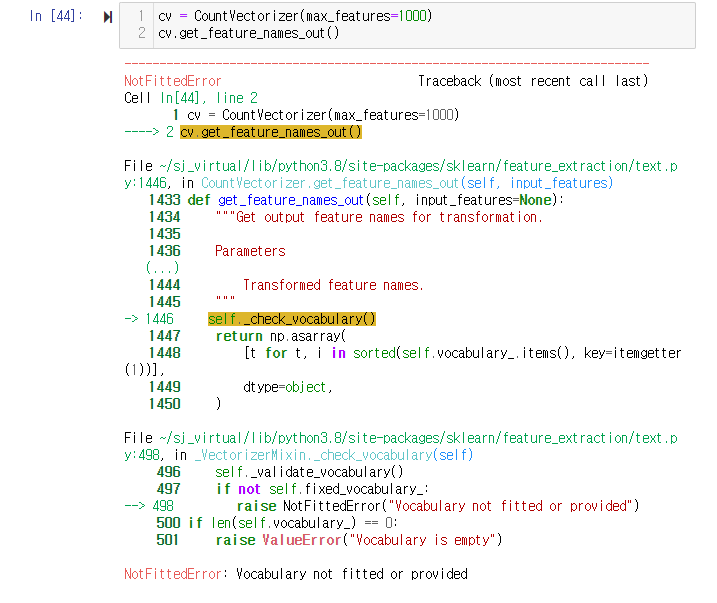
위와 같이 객체를 생성할때 단어집합을 제공하지 않을 경우에는 단어집합을 출력할때 오류가 발생한다.

In [48]:
len(movie_reviews.fileids())

2000

In [47]:
reviews_cv = cv.fit_transform(reviews)
print("type: ", type(reviews_cv))
print("shape: " ,reviews_cv.shape)
print("sample\n", reviews_cv[0,:10])

type:  <class 'scipy.sparse._csr.csr_matrix'>
shape:  (2000, 1000)
sample
   (0, 0)	6
  (0, 1)	3
  (0, 2)	6
  (0, 3)	3
  (0, 4)	3
  (0, 6)	2
  (0, 8)	1


* 우리는 위에서 type은 csr_matrix임을 알 수 있고
* shape은 (2000,1000)인것을 볼 수 있다.
    * 이는 2000개의 문서 그리고 1000개의 단어집합의 단어에 의한 결과이다.
* 그렇지만 sample은 좌표 `(문서번호, 단어번호)`와 빈도수로 이루어져있음을 확인할 수 있고, 자세히 확인해보면 **5번째와 7번째의 단어는 빠져있는 것을 볼 수 있다** 이는 빈도수에 의해서 빠진 것이고 이렇게 `mapping방식`으로 저장하는 이유는 희소한 행렬을 효율적으로 관리하기 위함이다. 
    * 위와 같은 데이터 타입을 **C**ompressed **S**parse **R**ow format이라고 한다.(Compressed:압축된)
        * 이 포맷을 넘파이 형태로 변경하고 싶으면 toarray() 메서드를 사용하면 된다.

In [50]:
# 실제 데이터를 보면 2백만개의 데이터가 있음을 확인할 수 있는데
# 이중 실제로 값이 있는 것은 25만개이므로 공간낭비가 심한 것을 볼 수 있다.
reviews_cv 

<2000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 252984 stored elements in Compressed Sparse Row format>

In [52]:
reviews_cv.toarray().shape

(2000, 1000)

In [54]:
reviews_cv.toarray()[0,:20]

array([6, 3, 6, 3, 3, 0, 2, 0, 1, 0, 1, 3, 2, 2, 1, 0, 1, 2, 3, 5])

In [55]:
# 우리가 앞에서 직접 계산한 카운트 벡터
feature_sets[0][:20]

[5, 3, 6, 3, 3, 0, 2, 0, 1, 0, 1, 3, 1, 2, 1, 0, 1, 2, 3, 5]

* 첫번째와 중간에 갯수 차이가 나는 이유는 우리가 만든 토크나이저와 CountVectorizer에서 사용하는 토크나이저가 다르기 때문이다.

In [59]:
for word_name, count in zip(cv.get_feature_names_out()[:20], reviews_cv.toarray()[0,:20]):
    print(f"{word_name}:{count}")


film:6
one:3
movie:6
like:3
even:3
time:0
good:2
story:0
would:1
much:0
also:1
get:3
character:2
two:2
well:1
first:0
characters:1
see:2
way:3
make:5


## 한국어 텍스트의 카운트 벡터 변환
* 앞에서 살펴보았듯이 한국어에서 의미를 갖는 최소단위는 형태소이다. 따라서 CountVectorizer를 그대로 사용하게 되면 한국어를 잘 임베딩 할 수 없다. 이러한 문제를 해결하기 위해서 **우리는 Konlpy의 형태소 분석기를 CountVectorizer의 Tokenizer로써 사용해주면 된다.**
    * 여기서는 daum_movie_review.csv 파일을 사용할 것이다.


In [14]:
import pandas as pd
df = pd.read_csv('./daum_movie_review.csv')
df.head(10)

,review,rating,date,title
0,돈 들인건 티가 나지만 보는 내내 하품만,1,2018.10.29,인피니티 워
1,몰입할수밖에 없다. 어렵게 생각할 필요없다. 내가 전투에 참여한듯 손에 땀이남.,10,2018.10.26,인피니티 워
2,이전 작품에 비해 더 화려하고 스케일도 커졌지만.... 전국 맛집의 음식들을 한데 ...,8,2018.10.24,인피니티 워
3,이 정도면 볼만하다고 할 수 있음!,8,2018.10.22,인피니티 워
4,재미있다,10,2018.10.20,인피니티 워
5,나는 재밌게 봄,10,2018.10.14,인피니티 워
6,0.5점은 줄 수 없냐?,0,2018.10.10,인피니티 워
7,헐..다 죽었어....나중에 앤트맨 보다가도 깜놀...,10,2018.10.08,인피니티 워
8,충격 결말,9,2018.10.06,인피니티 워
9,응집력,8,2018.10.05,인피니티 워


In [15]:
from sklearn.feature_extraction.text import CountVectorizer
daum_cv = CountVectorizer(max_features = 1000)
daum_DTM = daum_cv.fit_transform(df.review)
print(daum_cv.get_feature_names_out()[:100])

['10점' '18' '1987' '1도' '1점' '1점도' '2시간' '2시간이' '2편' '5점' '6점' '7점' '8점'
 'cg' 'cg가' 'cg는' 'cg도' 'cg만' 'good' 'of' 'ㅋㅋ' 'ㅋㅋㅋ' 'ㅋㅋㅋㅋ' 'ㅎㅎ' 'ㅎㅎㅎ'
 'ㅜㅜ' 'ㅠㅠ' 'ㅠㅠㅠ' 'ㅡㅡ' '가는' '가는줄' '가면' '가서' '가슴' '가슴아픈' '가슴이' '가장' '가족'
 '가족과' '가족들과' '가족의' '가족이' '가지고' '간만에' '갈수록' '감독' '감독님' '감독은' '감독의' '감독이'
 '감동' '감동과' '감동도' '감동은' '감동을' '감동이' '감동입니다' '감동적' '감동적이고' '감동적인' '감사드립니다'
 '감사합니다' '감정이' '갑자기' '갔는데' '갔다가' '강철비' '강추' '강추합니다' '같고' '같네요' '같다' '같습니다'
 '같아' '같아요' '같은' '같은데' '같음' '같이' '개연성' '개연성이' '개인적으로' '거의' '겁나' '것도' '것은'
 '것을' '것이' '것이다' '겨울왕국' '결국' '결말' '결말이' '계속' '고맙습니다' '곤지암' '공포' '공포를'
 '공포영화' '관객']


* 위결과는 위에서 말했듯이 문제가 많아보인다
    * cg가 들어간 단어가 전부 'cg', 'cg가', 'cg는' 등등으로 분리가 됐으면서
    * 감동이 들어간 단어가 전부 '감동','감동과','감동도','감동은'... 등으로 분리가 됐다.<br>
    &rightarrow;이런 단어들은 의미적으로 봤을때, 같은 단어로 취급하는 것이 바람직한다.

In [16]:
from konlpy.tag import Okt
# 두번째 리뷰에 대해 분리해본다.
twitter_tag = Okt()
print(twitter_tag.morphs(df.review[1]))
print()
print(twitter_tag.nouns(df.review[1]))
print()
print(twitter_tag.pos(df.review[1]))

['몰입', '할수밖에', '없다', '.', '어렵게', '생각', '할', '필요없다', '.', '내', '가', '전투', '에', '참여', '한', '듯', '손', '에', '땀', '이남', '.']

['몰입', '생각', '내', '전투', '참여', '듯', '손', '땀', '이남']

[('몰입', 'Noun'), ('할수밖에', 'Verb'), ('없다', 'Adjective'), ('.', 'Punctuation'), ('어렵게', 'Adjective'), ('생각', 'Noun'), ('할', 'Verb'), ('필요없다', 'Adjective'), ('.', 'Punctuation'), ('내', 'Noun'), ('가', 'Josa'), ('전투', 'Noun'), ('에', 'Josa'), ('참여', 'Noun'), ('한', 'Determiner'), ('듯', 'Noun'), ('손', 'Noun'), ('에', 'Josa'), ('땀', 'Noun'), ('이남', 'Noun'), ('.', 'Punctuation')]


* 위의 결과를 보면 morphs로 형태소 단위로 분리한 결과를 쓰기에는 필요없는 단어가 많이 보이고
* 명사만을 쓰기에는 너무 적어보인다.
* 품사 태깅 결과에서 Josa와 Punctuation을 빼는 것이 좋아보인다.
    * &rightarrow; **따라서 스스로의 Tokenizer를 만들어야 한다.**

In [17]:
def my_tokenizer(doc):
    return [token for token,pos in twitter_tag.pos(doc) if pos in ['Noun','Verb','Adjective']]
print("Self Tokenizer Result",my_tokenizer(df.review[1]))

Self Tokenizer Result ['몰입', '할수밖에', '없다', '어렵게', '생각', '할', '필요없다', '내', '전투', '참여', '듯', '손', '땀', '이남']


* 위에서 만든 Tokenizer를 이용해서 CountVectorizer를 구성한다.

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
# 토크나이저와 특성의 최대 개수를 지정
# 명사만 추출하고 싶은 경우에는 tokenizer에 'twitter_tag.nouns'를 바로 지정해도 된다.
daum_cv = CountVectorizer(max_features = 2000, tokenizer = my_tokenizer)
daum_DTM  = daum_cv.fit_transform(df.review) # review집합의 Series를 넣어주어도 괜찮다.원래는 문장 리스트를 넣어줬다.
print(daum_cv.get_feature_names_out()[:100]) # count vector에 사용된 Feature의 이름을 반환

['가' '가고' '가끔' '가는' '가는줄' '가득' '가면' '가볍게' '가서' '가슴' '가장' '가족' '가족영화' '가지'
 '가진' '가치' '각' '각본' '각색' '각자' '간' '간다' '간만' '갈' '갈수록' '감' '감도' '감독' '감동'
 '감명' '감사' '감사합니다' '감상' '감성' '감안' '감정' '감정이입' '감탄' '갑' '갑니다' '갑자기' '값'
 '갔는데' '갔다' '갔다가' '강' '강력' '강림' '강요' '강철' '강추' '갖춘' '같' '같고' '같네요' '같다'
 '같다는' '같습니다' '같아' '같아서' '같아요' '같았다' '같은' '같은데' '같음' '개' '개그' '개꿀잼' '개봉'
 '개성' '개연' '개인' '개판' '객관' '갠' '거' '거기' '거리' '거부' '거의' '거지' '거짓' '거짓말' '걱정'
 '건' '건가' '건지' '걸' '걸고' '걸까' '겁나' '겁니다' '것' '게' '게임' '겨울' '겨울왕국' '결과' '결론'
 '결말']


* 위에서 있었던 감동,cg등의 문제는 해결된 것으로 보인다.

In [19]:
daum_DTM.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [20]:
# 2차원으로 구성돼있다. 따라서 뒤에 [0]을 추가로 써줘야한다.
daum_DTM[1].toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [17]:
# 1번째 문서의
for word,count in zip(daum_cv.get_feature_names_out(),daum_DTM[1].toarray()[0]): 
    if count>0:
        print(word,':',count,end = ', ')

내 : 1, 듯 : 1, 몰입 : 1, 생각 : 1, 손 : 1, 없다 : 1, 필요없다 : 1, 할 : 1, 

## 카운트 벡터의 활용
* 카운트 벡터는 문서로부터 특징을 추출하는 하나의 방법으로 이해할 수 있다.
* 이렇게 추출한 벡터는 머신러닝 기법을 적용하기 위한 입력으로 문서분류부터 시작해 다양한 분야에 활용가능하다.
* 먼저, 카운트벡터는 문서의 특성을 표현하고 있어 문서간의 유사도를 측정하는데에 사용될 수 있다.
    * 이과정에서 코사인 유사도를 사용할 수 있다.
        * 단어별 빈도의 최솟값은 0 이므로 무조건 벡터는 1사분면 위에 있어서 코사인값이 0보다 작아지는 경우는 존재하지 않는다.
        * 이때 Sckitlearn의 cosine_similarity함수는 벡터 하나씩 유사도를 계산하지 않고 다수 벡터와 다수 벡터 간의 유사도를 한번에 계산하고 그 결과를 반환한다. m개 벡터와 n개 벡터간의 유사도를 한꺼번에 계산했다면 결과는 (m,n)의 2차원 행렬로 반환된다.
        * 아래의 예에서는 대상문서가 1개이고 이를 전체리뷰와 비교하므로 (1,2000)의 행렬로 반환될것이다.

In [19]:
from nltk.corpus import movie_reviews
reviews = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]
reviews[0]

'plot : two teen couples go to a church party , drink and then drive . \nthey get into an accident . \none of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . \nwhat\'s the deal ? \nwatch the movie and " sorta " find out . . . \ncritique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . \nwhich is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn\'t snag this one correctly . \nthey seem to have taken this pretty neat concept , but executed it terribly . \nso what are the problems with the movie ? \nwell , its main problem is that it\'s simply too jumbled . \nit starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience membe

In [25]:
from sklearn.feature_extraction.text import CountVectorizer 
cv = CountVectorizer(max_features = 1000)
reviews_cv = cv.fit_transform(reviews)

In [24]:
start = len(reviews[0])//2
source = reviews[0][-start:]
len([source]) # list(source)로 만들면 문자열이 한칸씩 분리 된다.

1

In [26]:
from sklearn.metrics.pairwise import cosine_similarity

# 첫째 리뷰의 문자수를 확인하고 뒤 절반을 가져오기 위해서 중심점을 찾음
start = len(reviews[0])//2
# 중심점으로부터 뒤 절반을 가져와서 비교할 문서를 생성
source = reviews[0][-start:]
# 코사인 유사도는 카운트벡터에 대해 계산하므로 벡터로 변환
# transform은 <반드시 리스트나 행렬 형태>의 입력을 요구하므로 리스트로 만들어서 입력
source_cv = cv.transform([source])
# 행렬의 크기를 확인, 문서가 하나이므로 (1,1000)
print("#대상 특성 행렬의 크기:",source_cv.shape)
# 변환되 count_vector와 기존 값들과의 Similarity계산 (유사도 측정을 원하는 것, 비교대상들)
# DTM이니깐 2차원임
sim_result = cosine_similarity(source_cv,reviews_cv)
print("#유사도 계산 행렬의 크기:", sim_result.shape)
print("#유사도 계산결과를 역순으로 정렬:", sorted(sim_result[0],reverse = True)[:10])

#대상 특성 행렬의 크기: (1, 1000)
#유사도 계산 행렬의 크기: (1, 2000)
#유사도 계산결과를 역순으로 정렬: [0.9406850065028822, 0.8449222207991461, 0.8348806607881823, 0.8326052445239385, 0.8315967745603229, 0.8273858498106984, 0.8245530382632896, 0.8219627744618032, 0.820420990734705, 0.8203286730382311]


* numpy의 argmax를 이용해서 가장 유사한 리뷰의 인덱스를 찾아보자.

In [36]:
import numpy as np
print('#가장 유사한 리뷰의 인덱스',np.argmax(sim_result[0]))
print('순서대로 정렬',(-sim_result[0]).argsort()[:10])

#가장 유사한 리뷰의 인덱스 0
순서대로 정렬 [   0  126 1501  100 1846  882 1560 1110    9 1570]


In [35]:
(-sim_result[0]).argsort()[:10]

array([   0,  126, 1501,  100, 1846,  882, 1560, 1110,    9, 1570])

In [33]:
np.argsort(-sim_result[0])[:10]

array([   0,  126, 1501, ..., 1754,  779,  506])

## TF-IDF(Term Frequency- Inverse Document Frequency)
만약 모든 축구팀에 손흥민이 있다고 해보자. 과연 손흥민이 팀간의 차이를 만들 수 있을까? 그렇지 않을 것이다.<br>
같은 논의로, 만약 어떤 단어가 모든 문서에 나타난다면 그 단어는 과연 중요한 단어일까?<br>
이전에는 이를 반영하지 않은채 많은 빈도를 갖은 벡터를 더 중요한 벡터로 봐왔다.이를 고려한 방식이 바로<br>
출현하는 문서의 갯수를 고려해서 이의 역수를 가중치로 준 이후 CountVector를 생성하는 방식인 TF-IDF방식이다. 식은 아래와 같다.
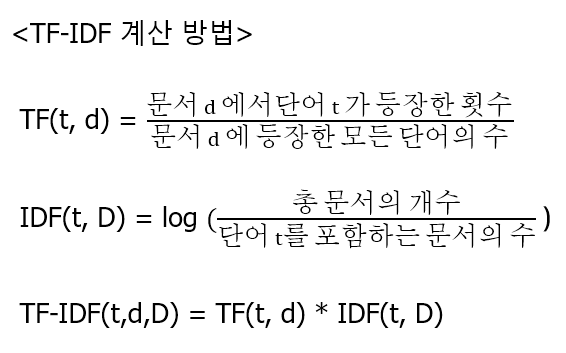
사이킷런은 텍스트로부터 바로 카운트 Vector를 생성할 수 있는 `TfidfVectorizer클래스`와 이미 생성된 CountVector로부터 Tfidf를 적용한 CountVector로 변환하는 `TfidfTransformer클래스` 두가지를 제공한다.
* 일반적으로, TF-IDF가 CountVectorizer하는 것보다 정확하다.

### TfidfTransformer를 사용

In [37]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformer

TfidfTransformer()

In [39]:
reviews_cv.toarray()

array([[10,  0,  0, ...,  3,  0,  2],
       [ 0,  0,  0, ...,  2,  0,  1],
       [ 0,  0,  0, ...,  2,  1,  0],
       ...,
       [ 1,  1,  0, ...,  2,  2,  3],
       [ 1,  0,  0, ...,  1,  0,  0],
       [ 0,  0,  0, ...,  2,  0,  1]])

In [40]:
reviews_tfidf = transformer.fit_transform(reviews_cv)
print("shape",reviews_tfidf.shape)
print(reviews_cv.toarray()[0][:20])
print(reviews_tfidf.toarray()[0][:20])

shape (2000, 1000)
[10  0  0  2  0  0  0  0  0  0  0  1  0  0  2  0  2  2  0  0]
[0.36352951 0.         0.         0.02838787 0.         0.
 0.         0.         0.         0.         0.         0.02536173
 0.         0.         0.04851355 0.         0.03515255 0.05097422
 0.         0.        ]


### TfidfVectorizer를 사용

In [42]:
start = len(reviews[0])//2
source = reviews[0][-start:]

In [43]:
len(reviews)

2000

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
tf = TfidfVectorizer(max_features = 1000)
reviews_tf = tf.fit_transform(reviews) # 2000x1000 matrix 생성
source_tf = tf.transform([source]) # source 벡터화 1x1000 리스트 형태로 주어야한다.
sim_result_tf = cosine_similarity(source_tf,reviews_tf) # 여기서 1x2000개의 행렬 생성 각 문서와 비교
print("가장 유사한 리뷰의 인덱스:",np.argmax(sim_result_tf[0]))

가장 유사한 리뷰의 인덱스: 0


In [49]:
print("일반 Count Vector:", (-sim_result[0]).argsort()[:10])
print("일반 Tfidf Vector:", (-sim_result_tf[0]).argsort()[:10])

일반 Count Vector: [   0  126 1501  100 1846  882 1560 1110    9 1570]
일반 Tfidf Vector: [   0 1846  126 1570  420 1642  771 1993  225  883]
